# Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

[]

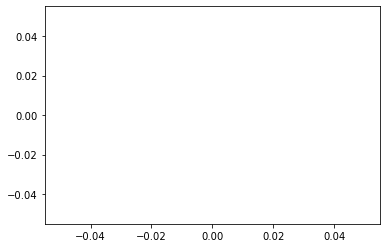

In [2]:
plt.plot() # Interfaz Pyplot

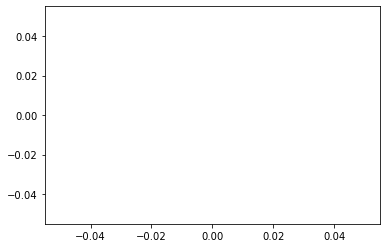

In [3]:
plt.plot(); # Añadiendo el ';' se quitan los corchetes del output

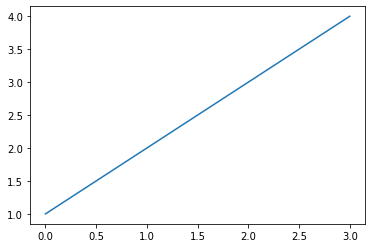

In [4]:
plt.plot([1,2,3,4]) # Toma como eje x los índices de la lista pasada

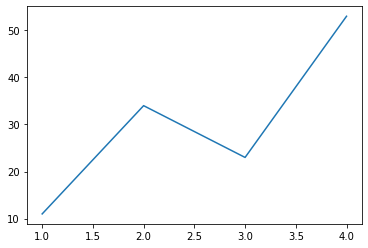

In [5]:
x = [1,2,3,4]
y = [11,34,23,53]
plt.plot(x,y);

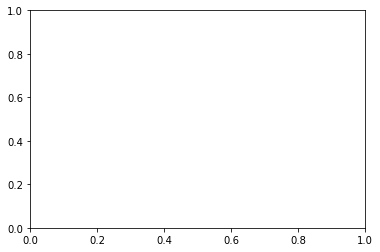

In [6]:
#Objet-ariented interface (es preferible frente a la interfaz Pyplot por ser más flexible)
#Method 1
fig = plt.figure() #Crea una figura
ax = fig.add_subplot() #Agrega ejes a la figura
plt.show()

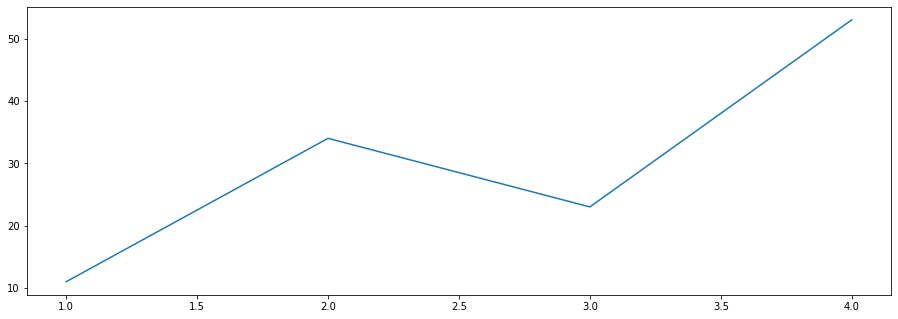

In [7]:
#Method 2
fig = plt.figure()
ax = fig.add_axes([1,2,2,1])
ax.plot(x,y)
plt.show()

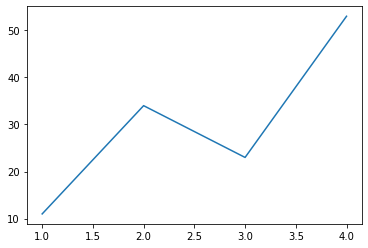

In [8]:
#Method 3 (recommended)
fig, ax = plt.subplots()
ax.plot(x,y)

# Matplotlib example workflow

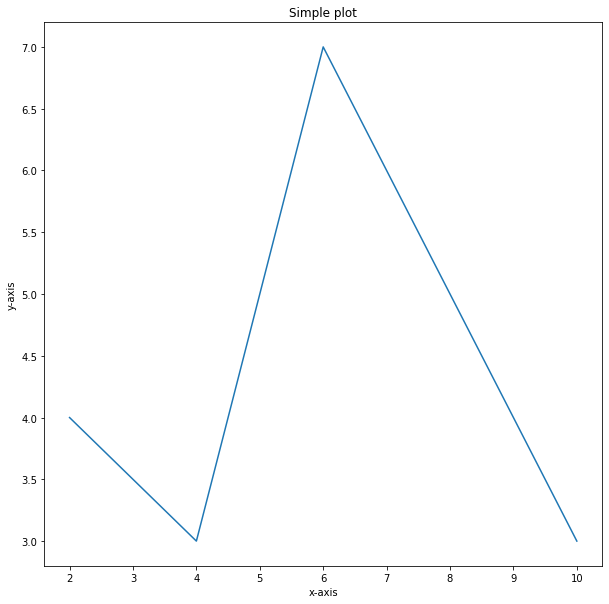

In [9]:
# 0. Import matplotlib and get it ready for plotting in jupyter
%matplotlib inline 
import matplotlib.pyplot as plt

# 1. Prepare data
x = [2,4,6,8,10]
y = [4,3,7,5,3]

# 2. Setup plot
fig,ax = plt.subplots(figsize=(10,10))    #(width,height)

# 3. Plot data
ax.plot(x,y)

# 4. Customize plot
ax.set(title="Simple plot",
      xlabel="x-axis",
      ylabel="y-axis");

# 5. Save & show
#fig.savefig(".\images\sample-plot.png")

## Making figures with numpy arrays
-Line plot.
-Scatter plot.
-Bar plot.
-Histogram.
-Subplots.

In [10]:
# Create some data 
x = np.linspace(1,10,100)
x[:10]

array([1.        , 1.09090909, 1.18181818, 1.27272727, 1.36363636,
       1.45454545, 1.54545455, 1.63636364, 1.72727273, 1.81818182])

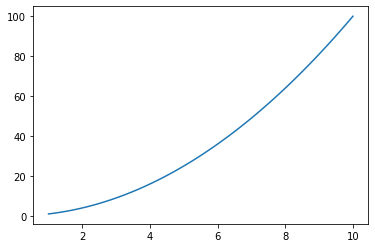

In [11]:
# Plot the data (line plot)
fig, ax = plt.subplots()
ax.plot(x,x**2)

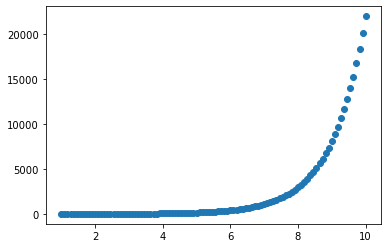

In [12]:
# Scatter plot with the same data
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

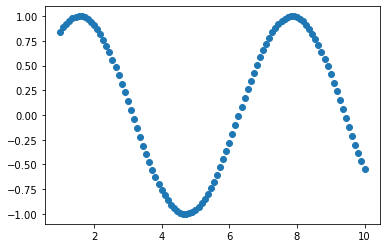

In [13]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

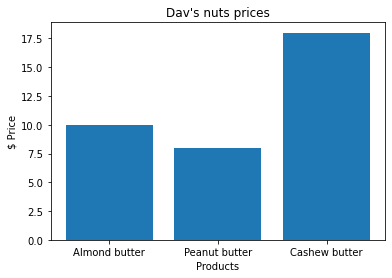

In [14]:
# Make a plot from a dictionary
nut_butter_prices = {'Almond butter':10,
                    'Peanut butter':8,
                    'Cashew butter':18}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dav's nuts prices",
      ylabel='$ Price',
      xlabel='Products');

<BarContainer object of 3 artists>

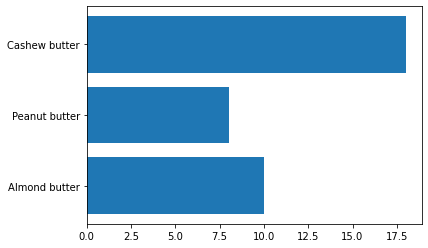

In [15]:
# This bar plot requires the passed items to be lists
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))

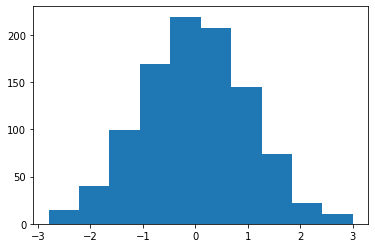

In [16]:
# Make some data for a histogram and plot it
x = np.random.randn(1000)

fig, ax = plt.subplots()
ax.hist(x);

# Two options for subplots

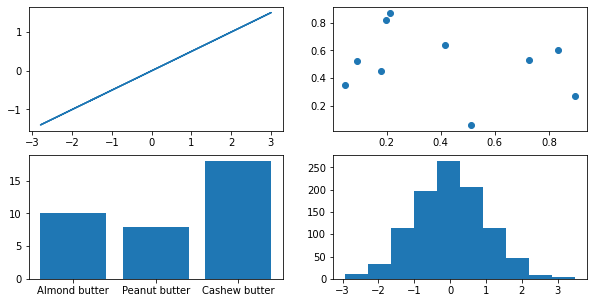

In [17]:
#Subplots option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10, 5))
#Plot to each different axis
ax1.plot(x,x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

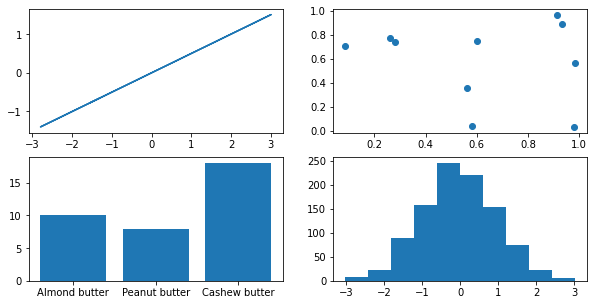

In [18]:
#Subplots option 2
fig, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10,5))
#Plot to each different index
ax[0,0].plot(x,x/2)
ax[0,1].scatter(np.random.random(10), np.random.random(10))
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax[1,1].hist(np.random.randn(1000));

# Plotting from Pandas Dataframes

In [19]:
# Make a dataframe
try:
    car_sales = pd.read_csv("datasets\car-sales.csv")
except FileNotFoundError:
    car_sales = pd.read_csv("datasets/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


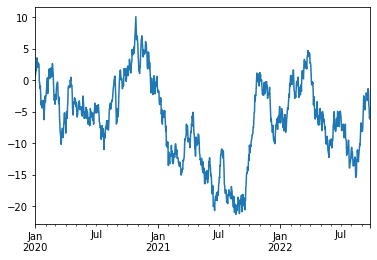

In [20]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2020', periods=1000))
ts = ts.cumsum()
ts.plot();

In [21]:
# Remove symbols from prices
car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]','',regex=True)
#Remove last 2 digits from price (cents)
car_sales['Price'] = car_sales['Price'].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [22]:
car_sales['Sale Date'] = pd.date_range('1/1/2020', periods=len(car_sales))
car_sales['Total sales'] = car_sales['Price'].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


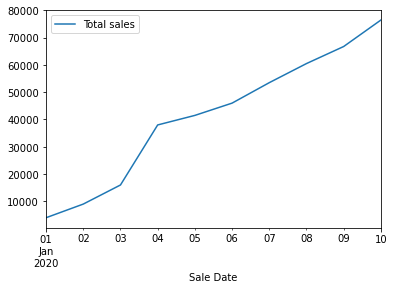

In [23]:
# Plot the total sales
car_sales.plot(x='Sale Date', y='Total sales');

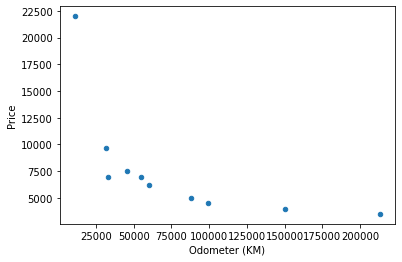

In [24]:
car_sales['Price'] = car_sales['Price'].astype(int)
car_sales.plot(x='Odometer (KM)', y='Price', kind="scatter");

In [25]:
# Create some data and a dataframe
x = np.random.rand(10,4)

df = pd.DataFrame(x, columns=['A','B','C','D'])
df

,A,B,C,D
0,0.059414,0.341634,0.856172,0.677531
1,0.193491,0.674565,0.121401,0.515785
2,0.649001,0.868513,0.723200,0.634251
3,0.838311,0.983822,0.639062,0.400801
4,0.919249,0.976275,0.707308,0.127672
5,0.487448,0.186826,0.620606,0.866886
6,0.307695,0.778548,0.242900,0.297340
7,0.495033,0.128801,0.892239,0.992825
8,0.515580,0.216097,0.630391,0.210111
9,0.830284,0.374497,0.500150,0.846531


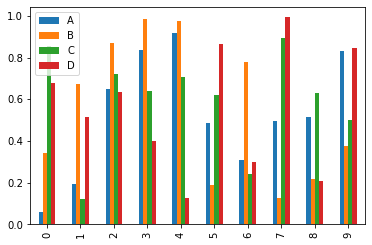

In [26]:
df.plot.bar();

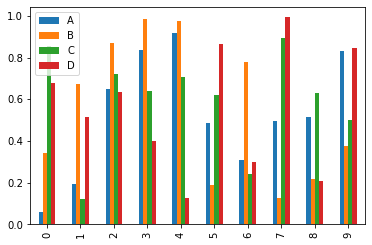

In [27]:
df.plot(kind='bar');

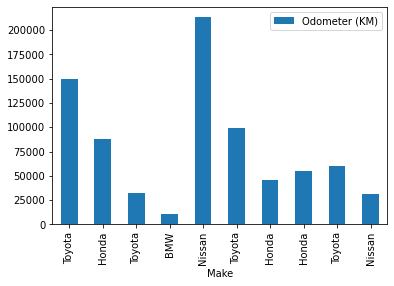

In [28]:
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar');

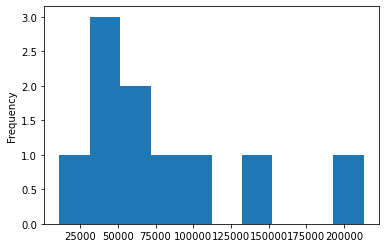

In [29]:
car_sales['Odometer (KM)'].plot(kind='hist');

# Heart disease dataset

In [30]:
try:
    heart_disease = pd.read_csv('datasets\heart-disease.csv')
except FileNotFoundError:
    heart_disease = pd.read_csv('datasets/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


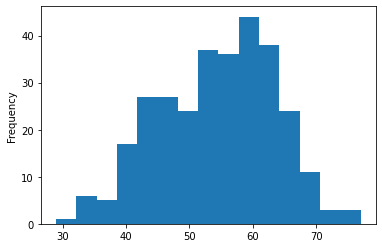

In [31]:
heart_disease['age'].plot(kind='hist', bins=15);

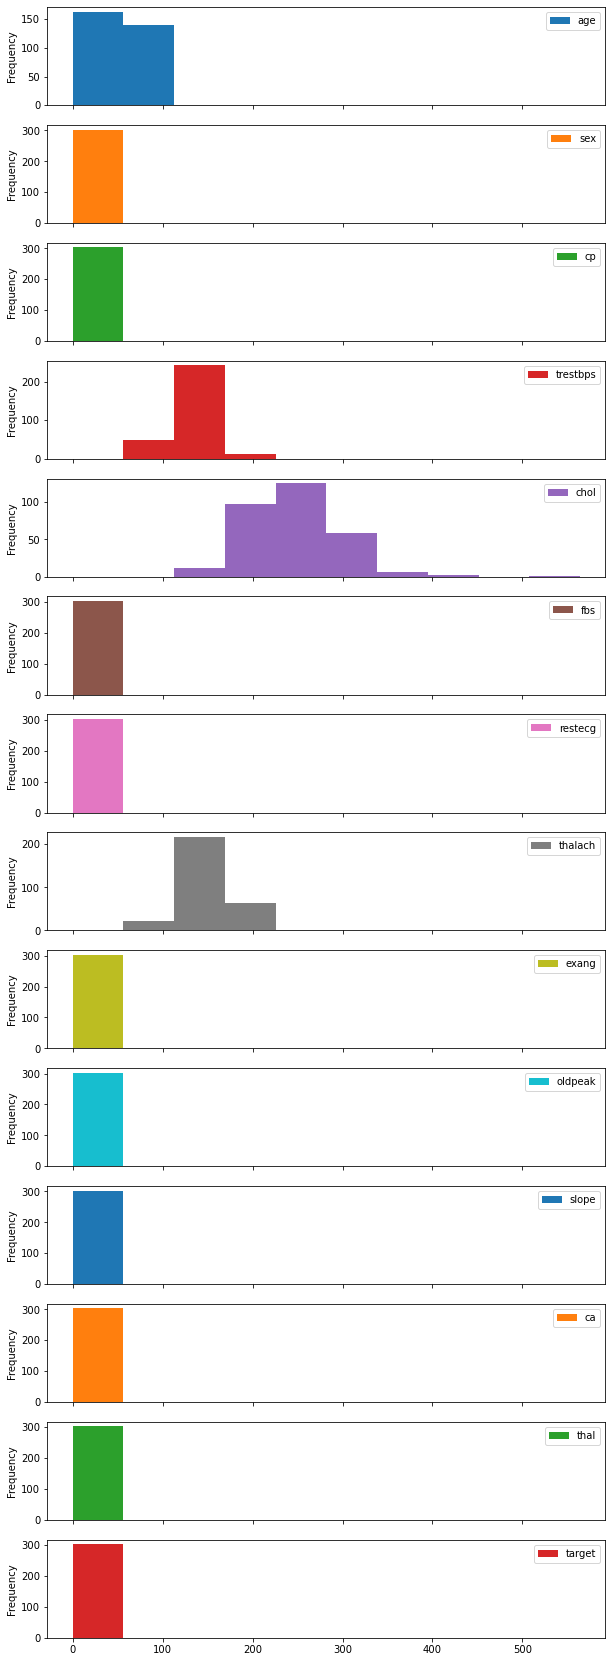

In [32]:
#Plotting directly fron pandas using the Pyplot interface
heart_disease.plot(kind='hist', subplots=True, figsize=(10,30));

# Which to use? (Pyplot vs Matplotlib OO method)
When plotting something quickly, use pyplot.
When plotting something more complex use the OO method.

In [33]:
#Plotting with the object oriented interface
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
over_50 = heart_disease[heart_disease['age']>50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


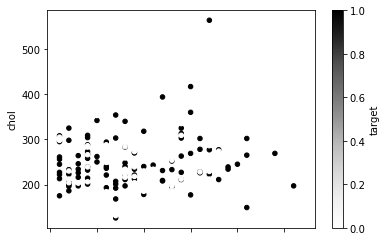

In [35]:
#Pyplot
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target');

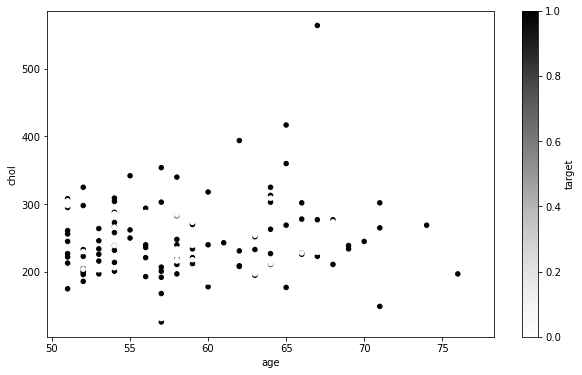

In [36]:
#OO method mixed with pyplot method
fix,ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            ax=ax);

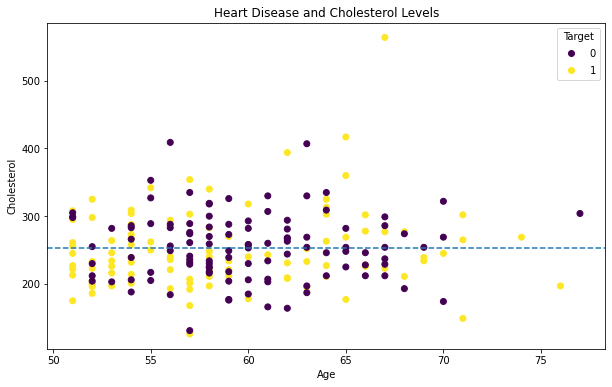

In [37]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

#Plot the data
scatter = ax.scatter(x=over_50['age'],
                    y=over_50['chol'],
                    c=over_50['target'])

#Customize the plot
ax.set(title='Heart Disease and Cholesterol Levels',
      xlabel='Age',
      ylabel='Cholesterol');

#Add a legend
ax.legend(*scatter.legend_elements(), title='Target');

#Add a horizontal line to indicate average chol level
ax.axhline(over_50['chol'].mean(),
          linestyle='--');

Text(0.5, 0.98, 'Heart Disease Analysis')

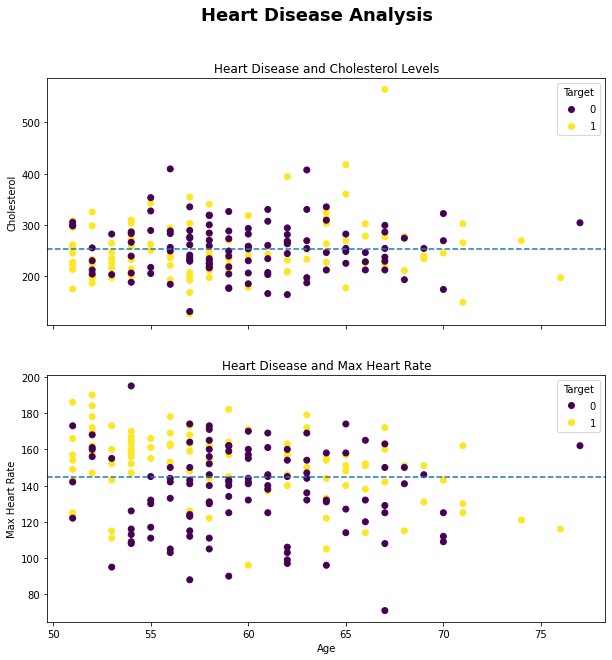

In [38]:
#Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10),
                              sharex=True)
#Add data to ax0
scatter = ax0.scatter(x=over_50['age'],
                     y=over_50['chol'],
                     c=over_50['target'])
#Customize ax0
ax0.set(title='Heart Disease and Cholesterol Levels',
       ylabel='Cholesterol')
ax0.legend(*scatter.legend_elements(), title='Target')
ax0.axhline(y=over_50['chol'].mean(), 
            linestyle='--')

#Add data to ax1
scatter = ax1.scatter(x=over_50['age'],
                     y=over_50['thalach'],
                     c=over_50['target'])

#Customize ax1
ax1.set(title='Heart Disease and Max Heart Rate',
       xlabel='Age',
       ylabel='Max Heart Rate')
ax1.legend(*scatter.legend_elements(), title='Target')
ax1.axhline(y=over_50['thalach'].mean(),
           linestyle='--');

#Add a title to the figure
fig.suptitle('Heart Disease Analysis', fontsize=18, fontweight='bold')

## Customizing and styling MatPlotLib

In [39]:
# See different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

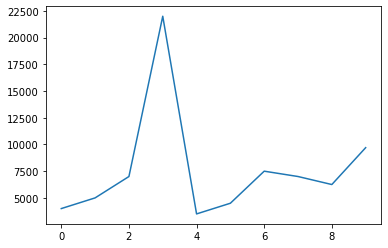

In [40]:
car_sales['Price'].plot();

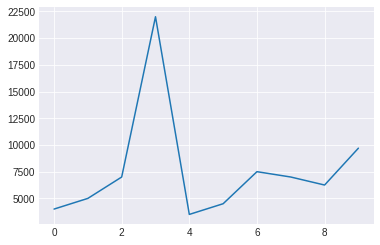

In [41]:
plt.style.use('seaborn-darkgrid')
car_sales['Price'].plot();

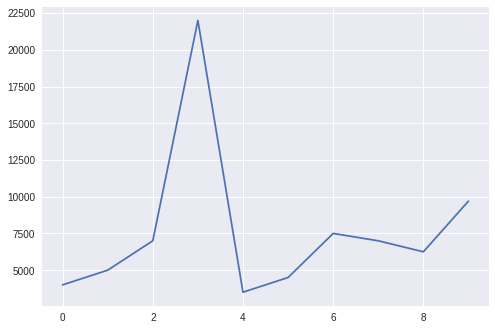

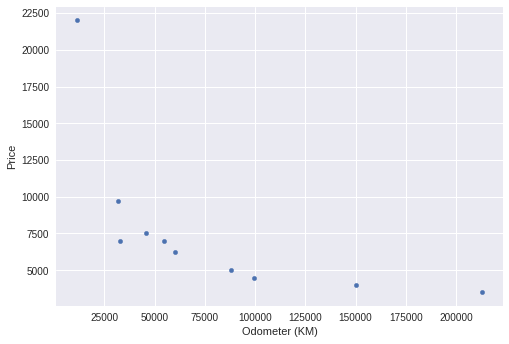

In [42]:
plt.style.use('seaborn')
car_sales['Price'].plot()
car_sales.plot(x='Odometer (KM)', y='Price', kind='scatter');

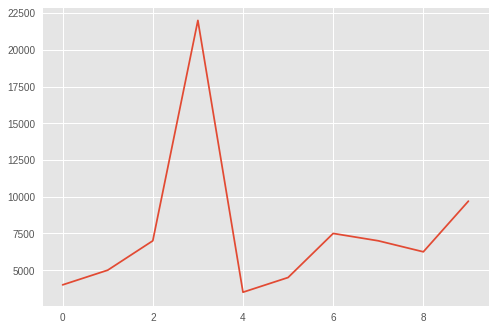

In [43]:
plt.style.use('ggplot')
car_sales['Price'].plot();

In [44]:
#Create some data
x = np.random.randn(10,4)
x

array([[ 1.87671929,  1.93415941,  0.3539382 , -0.83968546],
       [ 0.88110703, -0.15864107,  0.34895012,  1.12964952],
       [-0.72218314,  0.68936045, -1.43690491, -0.38773123],
       [ 0.44170652,  0.95480126, -1.5887869 ,  0.69065642],
       [ 1.85127691,  0.8299843 ,  0.44639795,  1.33688116],
       [ 1.07504408, -0.28351004,  1.38789374,  0.04273887],
       [ 0.81288237,  0.52223069, -0.24296621, -1.24160037],
       [-1.57046802, -0.13739314, -0.41999343, -2.7678651 ],
       [ 0.29730322,  0.81974747,  0.89365492, -1.09705896],
       [ 0.78244085, -0.26748997,  0.55862928,  1.08105742]])

In [45]:
df = pd.DataFrame(x, columns=['A','B','C','D'])
df

,A,B,C,D
0,1.876719,1.934159,0.353938,-0.839685
1,0.881107,-0.158641,0.348950,1.129650
2,-0.722183,0.689360,-1.436905,-0.387731
3,0.441707,0.954801,-1.588787,0.690656
4,1.851277,0.829984,0.446398,1.336881
5,1.075044,-0.283510,1.387894,0.042739
6,0.812882,0.522231,-0.242966,-1.241600
7,-1.570468,-0.137393,-0.419993,-2.767865
8,0.297303,0.819747,0.893655,-1.097059
9,0.782441,-0.267490,0.558629,1.081057


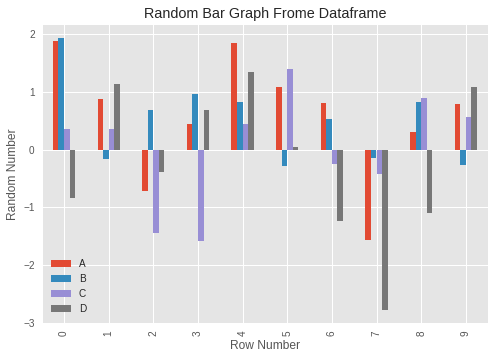

In [46]:
ax = df.plot(kind='bar')
ax.set(title='Random Bar Graph Frome Dataframe',
      xlabel='Row Number',
      ylabel='Random Number');
ax.legend().set_visible(True)

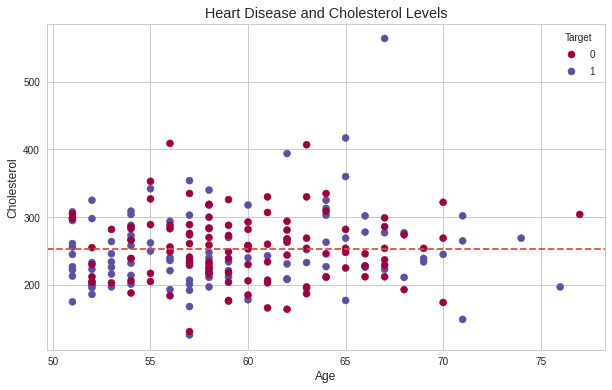

In [47]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(x=over_50['age'],
                    y=over_50['chol'],
                    c=over_50['target'],
                    cmap='Spectral')    #Available color maps: https://matplotlib.org/stable/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py
ax.set(title='Heart Disease and Cholesterol Levels',
      xlabel='Age',
      ylabel='Cholesterol')
ax.legend(*scatter.legend_elements(), title='Target')
ax.axhline(over_50['chol'].mean(),
          linestyle='--');

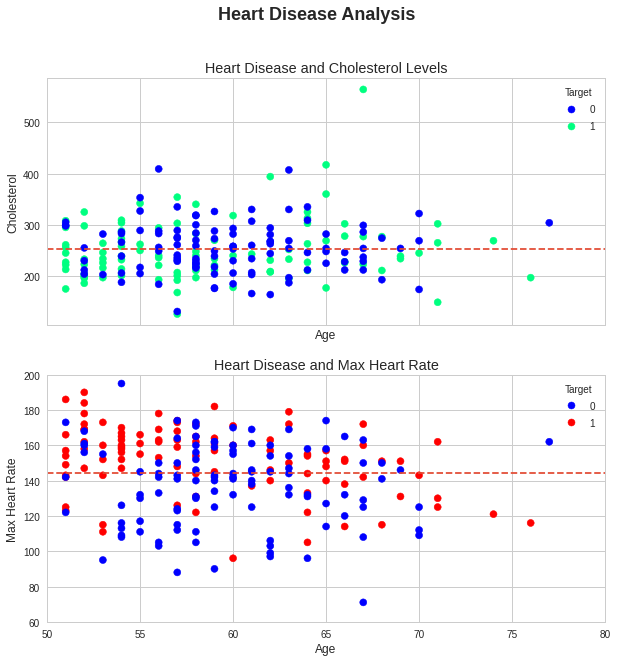

In [48]:
#Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10),
                              sharex=True)
#Add data to ax0
scatter = ax0.scatter(x=over_50['age'],
                     y=over_50['chol'],
                     c=over_50['target'],
                     cmap='winter')
#Customize ax0
ax0.set(title='Heart Disease and Cholesterol Levels',
       ylabel='Cholesterol', xlabel='Age')
#Change the x axis limits
ax0.set_xlim([50,80])
ax0.legend(*scatter.legend_elements(), title='Target')
ax0.axhline(y=over_50['chol'].mean(), 
            linestyle='--');

#Add data to ax1
scatter = ax1.scatter(x=over_50['age'],
                     y=over_50['thalach'],
                     c=over_50['target'],
                     cmap='bwr')
#Customize ax1
ax1.set(title='Heart Disease and Max Heart Rate',
       xlabel='Age',
       ylabel='Max Heart Rate')
#Change ax1 y limit
ax1.set_ylim([60,200])
ax1.legend(*scatter.legend_elements(), title='Target')
ax1.axhline(y=over_50['thalach'].mean(),
           linestyle='--');

#Add a title to the figure
fig.suptitle('Heart Disease Analysis', fontsize=18, fontweight='bold');

In [71]:
# Save current figure
if (str(sys.platform)=='linux'):
    fig.savefig('images/Heart_disease_analysis.png')
elif str(sys.platform) == 'win32':
    fig.savefig('images\Heart_disease_analysis.png')